<a href="https://colab.research.google.com/github/Pritesh934/EDA-on-Dallas-Weather-Data-Set/blob/master/3rd_copy_of_1002333230.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Required Libraries and Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Reading the dataset or csv file
df = pd.read_csv('/content/Dallas_weather_data.csv')

# Printing Top Rows
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Dallas, TX, United States",2024-01-01,48.5,32.0,39.9,45.9,22.6,34.6,30.4,69.7,...,16.2,8,10,2024-01-01T07:29:43,2024-01-01T17:31:46,0.69,Clear,Clear conditions throughout the day.,clear-day,"F8578,KLNC,KDAL,72259903971,KRBD,72258013960,7..."
1,"Dallas, TX, United States",2024-01-02,47.7,32.6,40.2,47.7,29.7,37.9,33.3,77.5,...,8.3,7,10,2024-01-02T07:29:55,2024-01-02T17:32:30,0.72,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"F8578,KLNC,KDAL,72259903971,KRBD,72258013960,7..."
2,"Dallas, TX, United States",2024-01-03,54.3,41.6,45.7,54.3,37.4,44.8,40.0,81.3,...,11.6,7,10,2024-01-03T07:30:05,2024-01-03T17:33:16,0.75,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"F8578,KLNC,KDAL,72259903971,KRBD,72258013960,7..."
3,"Dallas, TX, United States",2024-01-04,57.5,36.6,47.1,57.5,35.8,46.7,39.3,76.7,...,14.9,8,10,2024-01-04T07:30:14,2024-01-04T17:34:03,0.78,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"F8578,KLNC,KDAL,72259903971,KRBD,72258013960,7..."
4,"Dallas, TX, United States",2024-01-05,50.4,44.0,46.9,50.4,38.8,43.9,43.4,87.8,...,3.7,2,10,2024-01-05T07:30:21,2024-01-05T17:34:50,0.81,"Rain, Overcast",Cloudy skies throughout the day with early mor...,rain,"F8578,KLNC,KDAL,72259903971,KRBD,72258013960,7..."


1. Providing Sample Description

In [ ]:
# Number of Rows & Columns
df.shape

(366, 33)

In [ ]:
# Data Type ?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              366 non-null    object 
 1   datetime          366 non-null    object 
 2   tempmax           366 non-null    float64
 3   tempmin           366 non-null    float64
 4   temp              366 non-null    float64
 5   feelslikemax      366 non-null    float64
 6   feelslikemin      366 non-null    float64
 7   feelslike         366 non-null    float64
 8   dew               366 non-null    float64
 9   humidity          366 non-null    float64
 10  precip            366 non-null    float64
 11  precipprob        366 non-null    int64  
 12  precipcover       366 non-null    float64
 13  preciptype        117 non-null    object 
 14  snow              366 non-null    float64
 15  snowdepth         366 non-null    int64  
 16  windgust          366 non-null    float64
 1

In [ ]:
# Summary of Statistics
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,78.699180,60.439617,69.224044,80.247541,59.536612,69.736066,55.220219,64.364208,0.119732,31.967213,...,13.786612,163.875137,1015.157377,45.054372,9.423770,199.790164,17.264754,8.254098,25.942623,0.488087
std,15.368373,15.260602,15.135806,17.799616,17.690415,17.667156,15.312014,13.929649,0.364884,46.698790,...,4.289453,88.720803,5.932348,29.251141,1.026209,85.092443,7.345112,2.590483,24.706485,0.292170
min,23.200000,10.700000,15.500000,10.100000,-3.900000,2.200000,0.700000,32.000000,0.000000,0.000000,...,4.600000,1.400000,999.900000,0.000000,2.400000,0.500000,0.000000,0.000000,10.000000,0.000000
25%,68.100000,48.850000,58.925000,68.100000,47.700000,58.825000,45.525000,54.425000,0.000000,0.000000,...,10.800000,108.050000,1011.000000,19.325000,9.500000,143.900000,12.425000,8.000000,10.000000,0.250000
50%,81.450000,63.700000,72.650000,81.200000,63.700000,72.650000,58.700000,62.750000,0.000000,0.000000,...,13.100000,157.300000,1014.700000,41.300000,9.900000,210.050000,18.200000,10.000000,10.000000,0.500000
75%,91.050000,73.475000,81.250000,94.275000,73.475000,83.500000,68.175000,74.150000,0.018750,100.000000,...,16.200000,186.925000,1018.175000,67.775000,9.900000,266.850000,23.000000,10.000000,30.000000,0.750000
max,104.700000,83.200000,93.600000,110.800000,88.700000,99.400000,75.600000,98.800000,3.250000,100.000000,...,30.700000,359.500000,1034.900000,100.000000,9.900000,342.000000,29.700000,10.000000,100.000000,0.980000


In [ ]:
data = df.drop_duplicates(subset=["datetime", "conditions"])
df.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [ ]:
df['conditions'].value_counts()

,count
conditions,
Partially cloudy,148
Clear,98
"Rain, Partially cloudy",84
"Rain, Overcast",29
Overcast,3
"Snow, Rain, Overcast",2
"Snow, Partially cloudy",1
"Snow, Rain, Partially cloudy",1


In [ ]:
df['preciptype'].value_counts()

,count
preciptype,
rain,113
"rain,snow",3
snow,1


In [ ]:
df['icon'].value_counts()

,count
icon,
partly-cloudy-day,148
rain,116
clear-day,98
cloudy,3
snow,1


2. Checking for Data that is missing (basically null or missing values)

In [ ]:
# Checking for Null/missing values
df.isnull().sum()

,0
name,0
datetime,0
tempmax,0
tempmin,0
temp,0
feelslikemax,0
feelslikemin,0
feelslike,0
dew,0
humidity,0


3. Data Visualizations

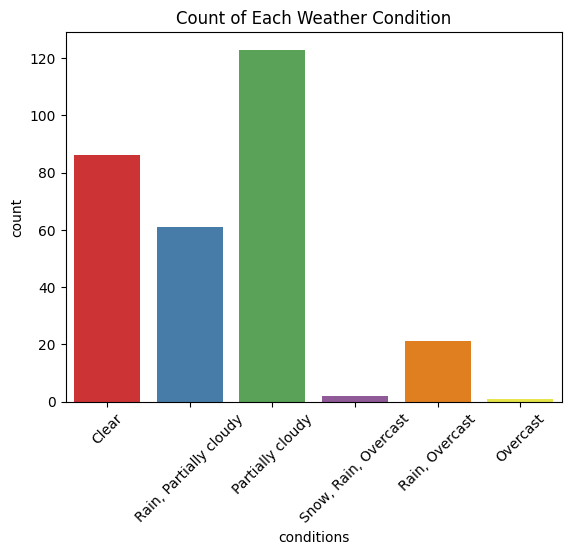

In [ ]:
# Bar Charts
sns.countplot(x='conditions', hue='conditions', data=df, palette='Set1', legend=False)
plt.title('Count of Each Weather Condition')
plt.xticks(rotation=45)
plt.show()

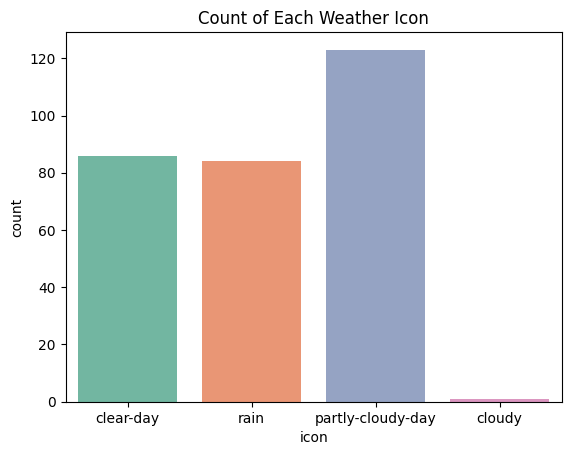

In [ ]:
# Bar Charts
sns.countplot(x='icon', hue='icon', data=df, palette='Set2', legend=False)
plt.title('Count of Each Weather Icon')
plt.show()


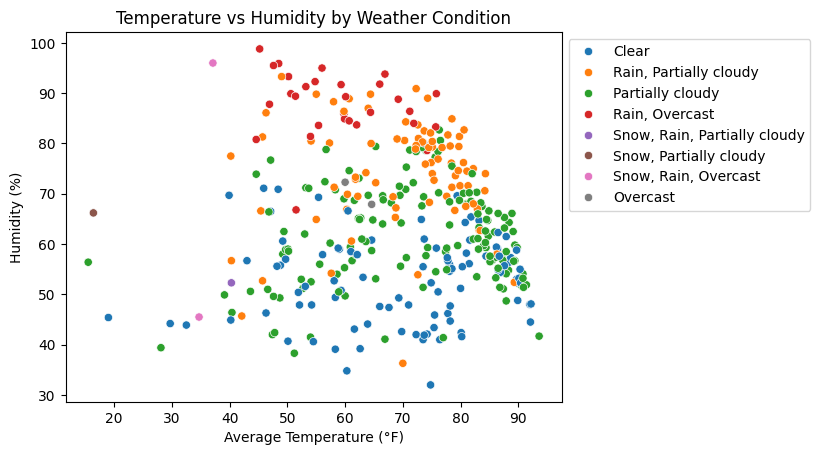

In [ ]:
# Scatter Plots
sns.scatterplot(x='temp', y='humidity', hue='conditions', data=df) # Relation between variables
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Temperature vs Humidity by Weather Condition')
plt.xlabel('Average Temperature (°F)')
plt.ylabel('Humidity (%)')
plt.show()

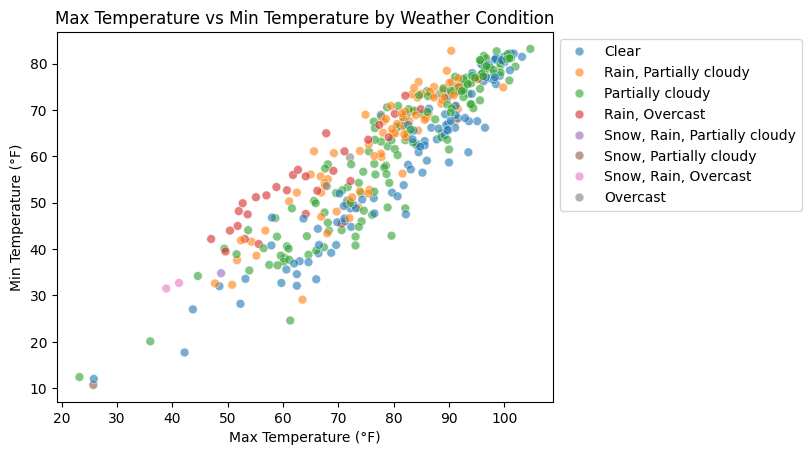

In [ ]:
# Scatter Plots
sns.scatterplot(x='tempmax', y='tempmin', hue='conditions', data=df, alpha=0.6, s=40, edgecolor='w', linewidth=0.5)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Max Temperature vs Min Temperature by Weather Condition')
plt.xlabel('Max Temperature (°F)')
plt.ylabel('Min Temperature (°F)')
plt.show()

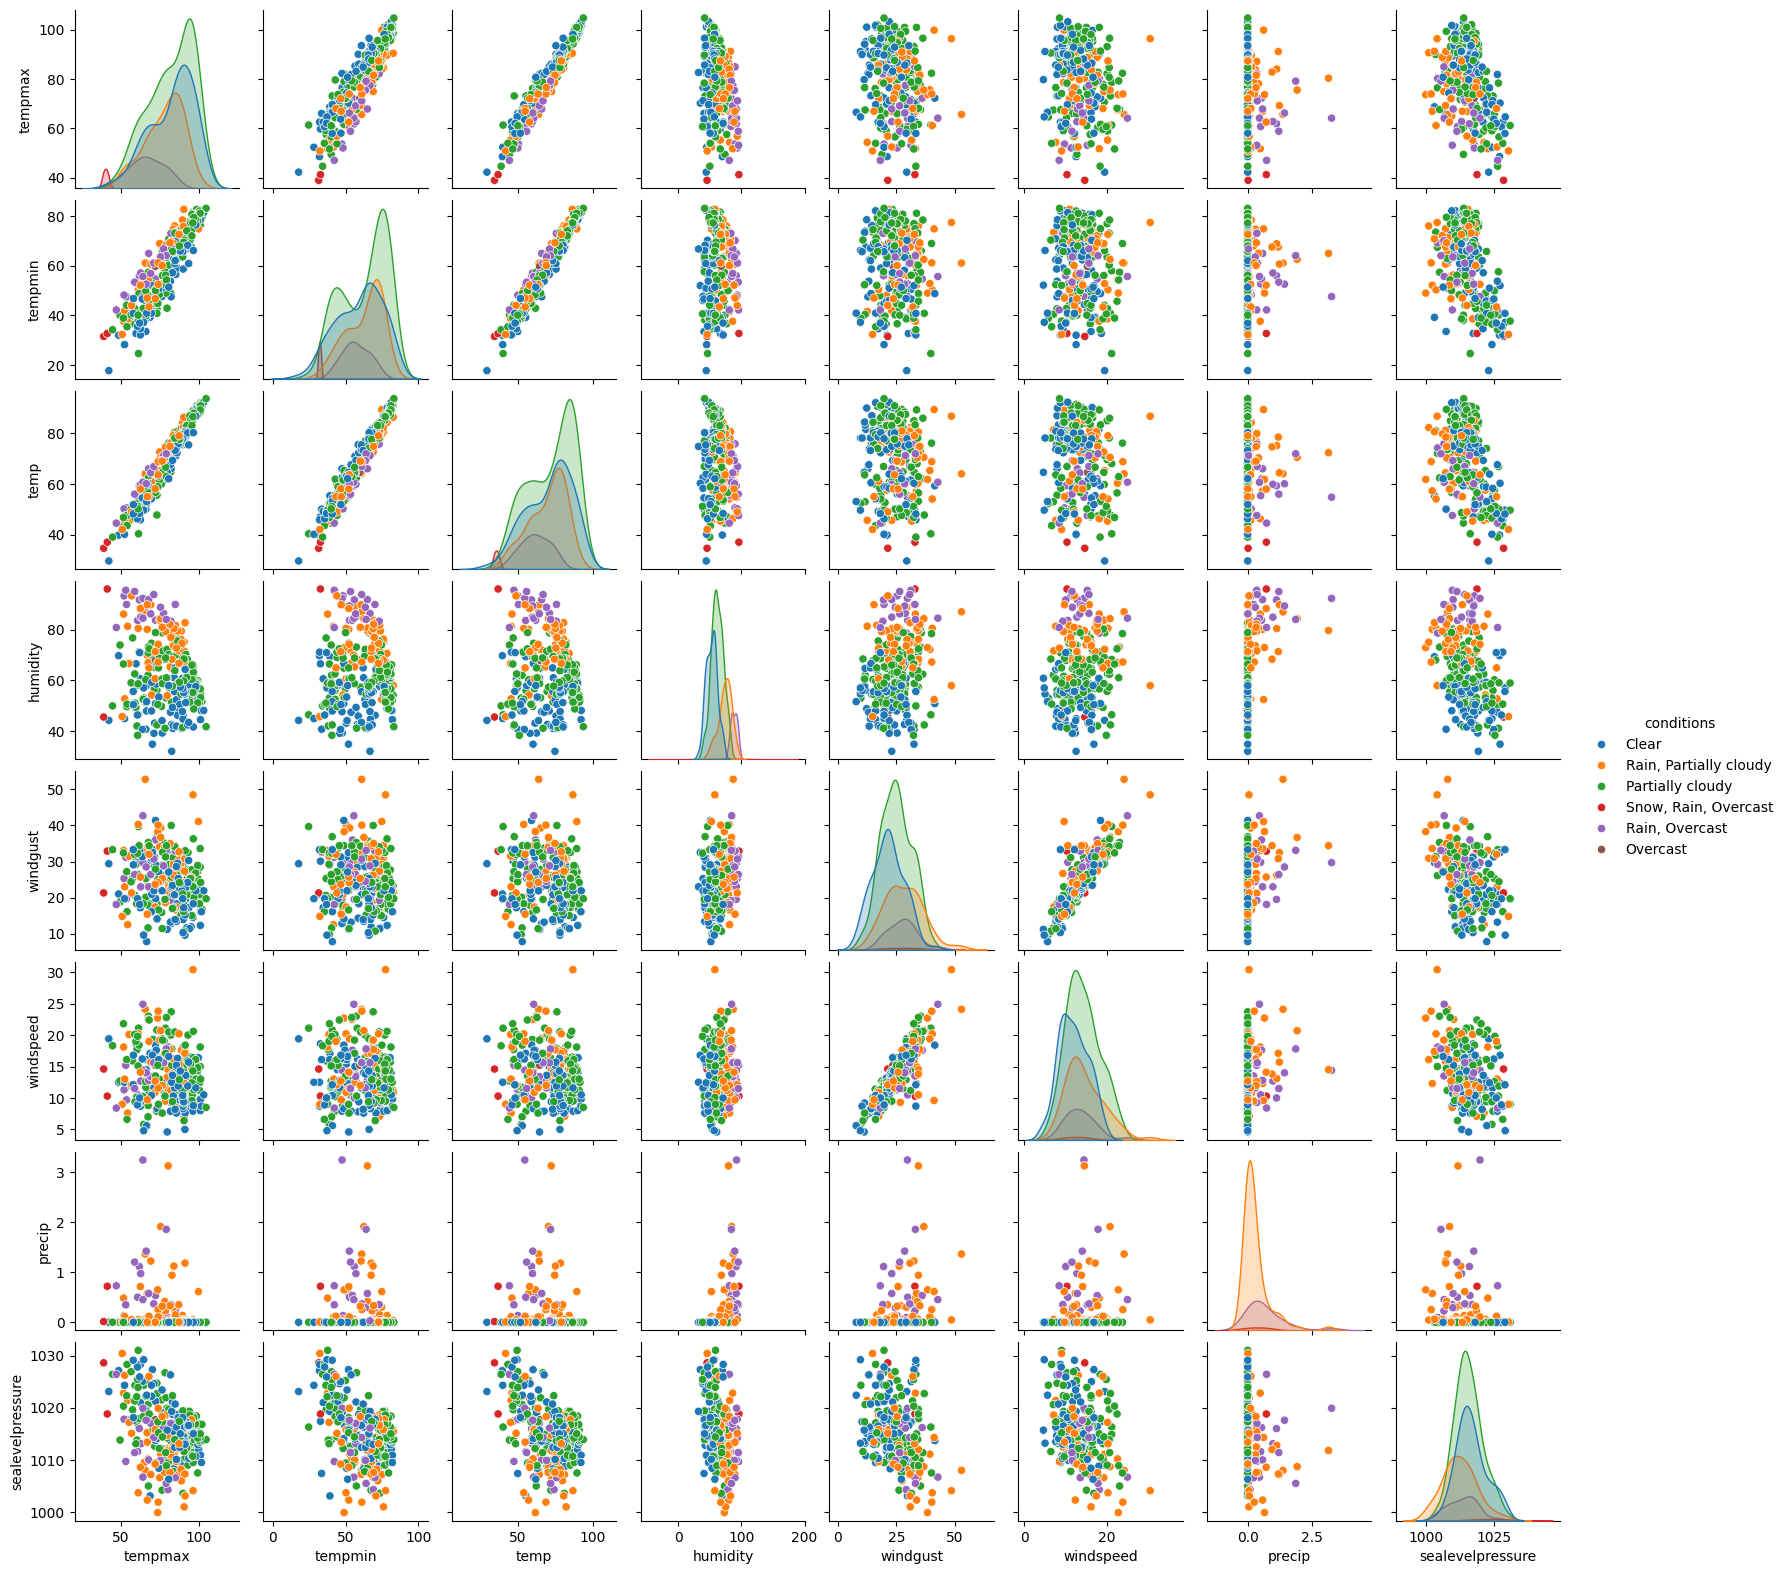

In [ ]:
# Comparing all the involved variables
numeric_cols = ['tempmax', 'tempmin', 'temp', 'humidity', 'windgust', 'windspeed','precip', 'sealevelpressure']
sns.pairplot(df[numeric_cols + ['conditions']], hue='conditions', height=2)
plt.show()

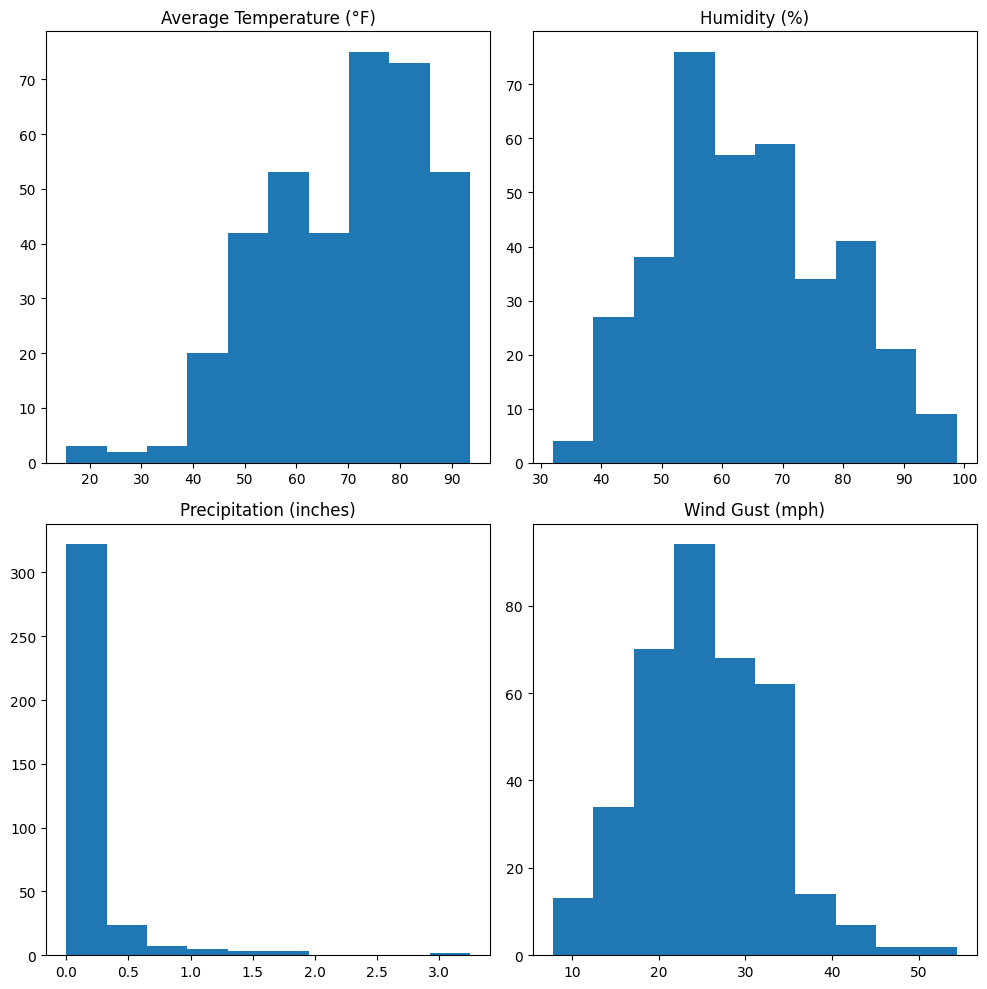

In [ ]:
# Histograms
fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Average Temperature (°F)")
axes[0,0].hist(df['temp'], bins=10)

axes[0,1].set_title("Humidity (%)")
axes[0,1].hist(df['humidity'], bins=10)

axes[1,0].set_title("Precipitation (inches)")
axes[1,0].hist(df['precip'], bins=10)

axes[1,1].set_title("Wind Gust (mph)")
axes[1,1].hist(df['windgust'], bins=10)

plt.tight_layout()
plt.show()


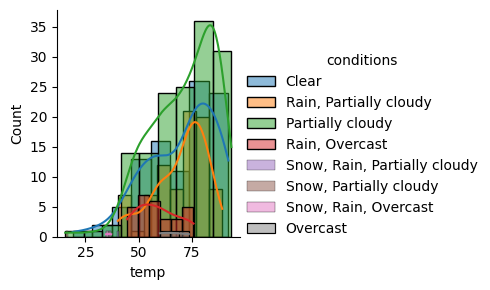

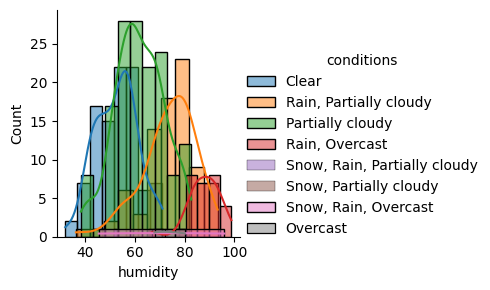

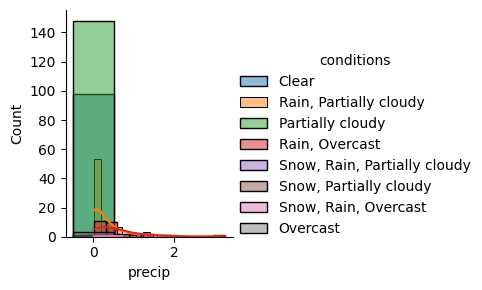

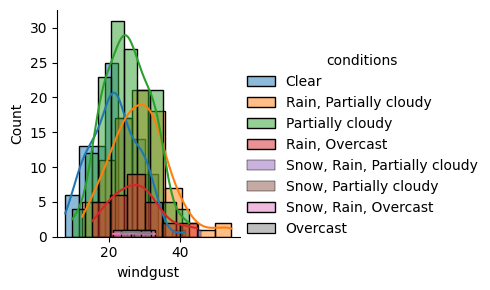

In [ ]:
# 1. Average Temperature
plot = sns.FacetGrid(df, hue="conditions")
plot.map(sns.histplot, "temp", kde=True).add_legend()

# 2. Humidity
plot = sns.FacetGrid(df, hue="conditions")
plot.map(sns.histplot, "humidity", kde=True).add_legend()

# 3. Precipitation
plot = sns.FacetGrid(df, hue="conditions")
plot.map(sns.histplot, "precip", kde=True).add_legend()

# 4. Wind Gust
plot = sns.FacetGrid(df, hue="conditions")
plot.map(sns.histplot, "windgust", kde=True).add_legend()

plt.show()


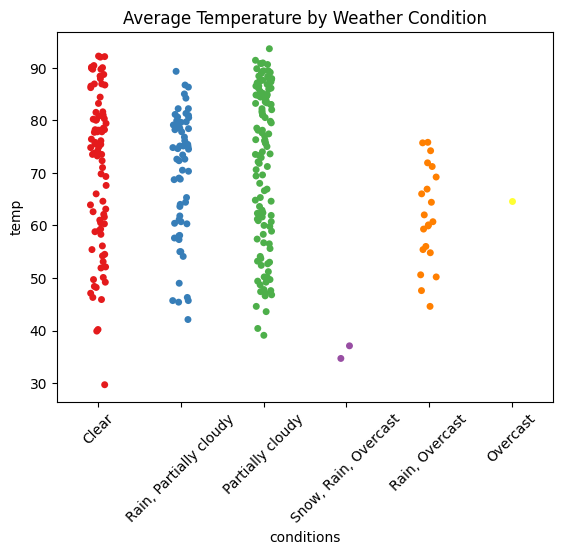

In [ ]:
# Average Temperature by Weather Condition Using a Strip Plot
sns.stripplot(y='temp', x='conditions', data=df, hue='conditions', palette='Set1')       # Color dots by precipitation type
plt.title("Average Temperature by Weather Condition")
plt.xticks(rotation=45)
plt.show()

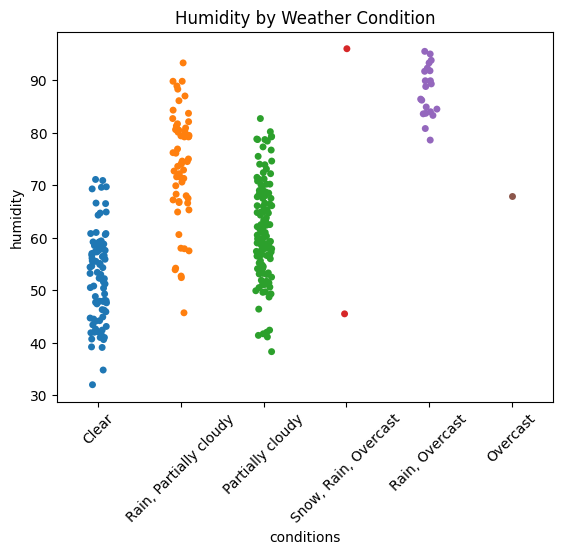

In [ ]:
# Humidity by Weather Condition using a Strip Plot
sns.stripplot(y='humidity', x='conditions', data=df, hue='conditions', palette='tab10')
plt.title("Humidity by Weather Condition")
plt.xticks(rotation=45)
plt.show()

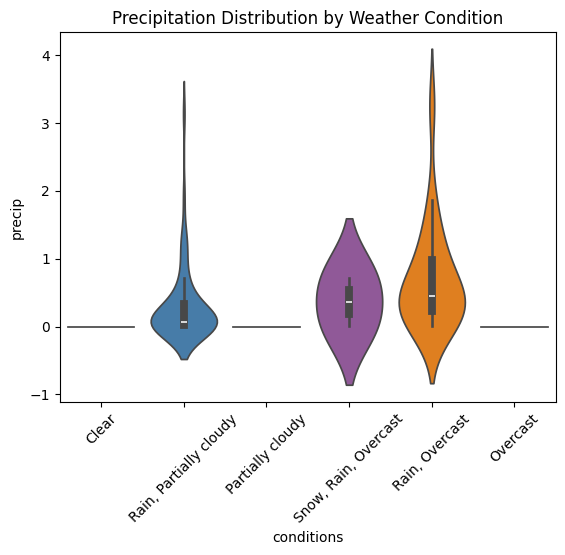

In [ ]:
# Precipitation Distribution by Weather Condition using a Violin Plot
sns.violinplot(x='conditions', y='precip', data=df, palette='Set1', hue='conditions')
plt.title("Precipitation Distribution by Weather Condition")
plt.xticks(rotation=45)
plt.show()

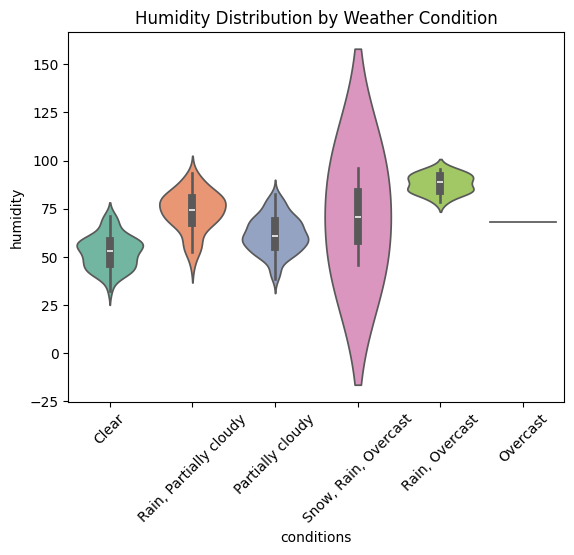

In [ ]:
# Humidity Distribution by weather Condition
sns.violinplot(x='conditions', y='humidity', data=df, palette='Set2', hue='conditions')
plt.title("Humidity Distribution by Weather Condition")
plt.xticks(rotation=45)
plt.show()


4. Correlation

In [ ]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr(method='pearson')
print(correlation_matrix)


                   tempmax   tempmin      temp  feelslikemax  feelslikemin  \
tempmax           1.000000  0.917183  0.974860      0.987358      0.918669   
tempmin           0.917183  1.000000  0.978161      0.927596      0.993357   
temp              0.974860  0.978161  1.000000      0.973825      0.977019   
feelslikemax      0.987358  0.927596  0.973825      1.000000      0.928118   
feelslikemin      0.918669  0.993357  0.977019      0.928118      1.000000   
feelslike         0.969678  0.974892  0.996154      0.978455      0.978628   
dew               0.834437  0.939397  0.909139      0.860801      0.936941   
humidity         -0.191576  0.049415 -0.070380     -0.132178      0.049975   
precip           -0.137288 -0.029560 -0.080323     -0.128630     -0.031949   
precipprob       -0.240119 -0.048299 -0.147607     -0.196991     -0.057268   
precipcover      -0.263571 -0.078831 -0.167685     -0.232321     -0.083369   
snow             -0.180754 -0.170836 -0.182925     -0.196844    

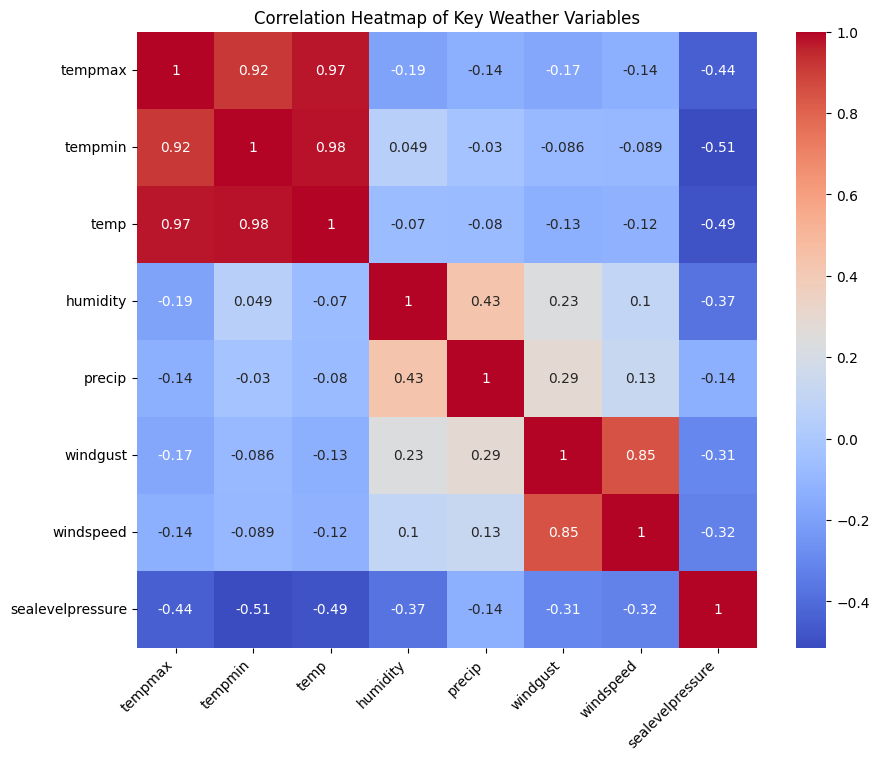

In [ ]:
# Define Some of the Key Variables as there are too many otherwise
key_cols = ['tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'windgust', 'windspeed', 'sealevelpressure']

# Subsetting the DataFrame by calculating correlation
corr_subset = df[key_cols].corr(method='pearson')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Key Weather Variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

5. Detecting/Removing Outliers

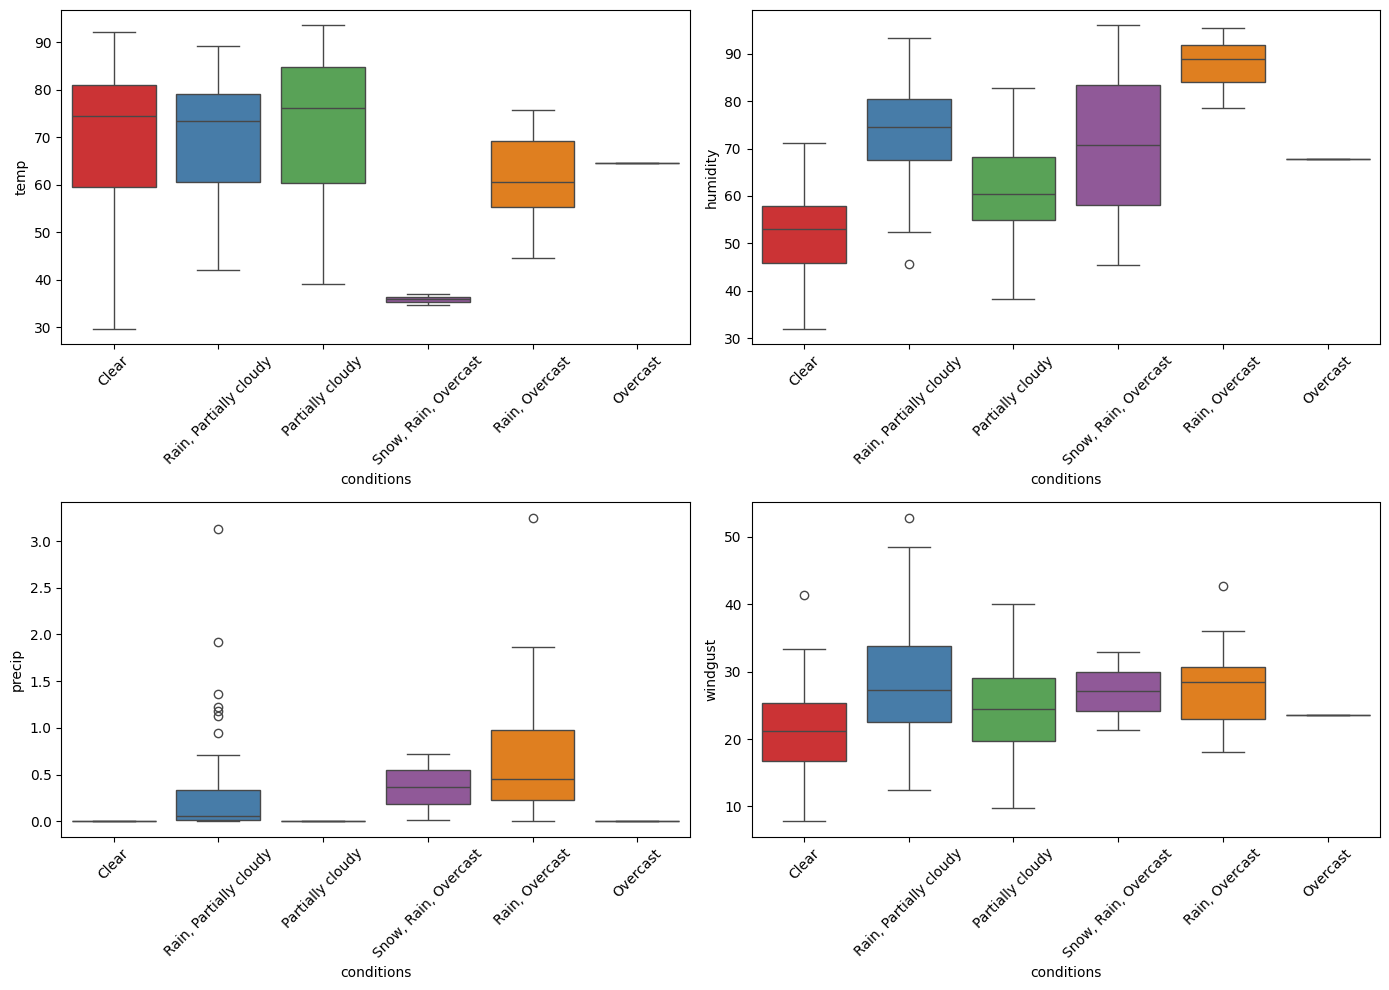

In [ ]:
def graph(y):
    sns.boxplot(x='conditions', y=y, data=df, hue='conditions', palette='Set1')
    plt.xticks(rotation=45)

plt.figure(figsize=(14, 10))

plt.subplot(221)
graph('temp')             # Average Temperature

plt.subplot(222)
graph('humidity')         # Humidity

plt.subplot(223)
graph('precip')           # Precipitation

plt.subplot(224)
graph('windgust')         # Wind Gust

plt.tight_layout()
plt.show()

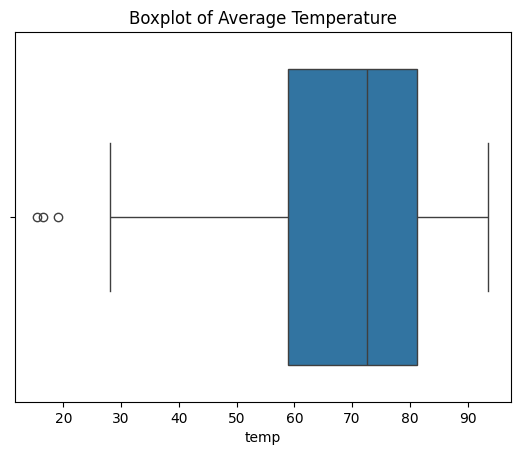

In [ ]:
sns.boxplot(x='temp', data=df)
plt.title('Boxplot of Average Temperature')
plt.show()

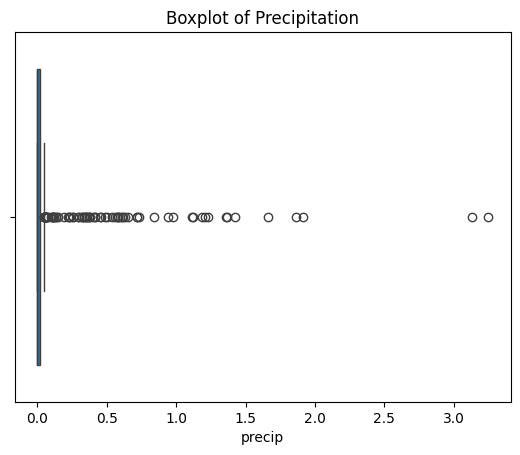

In [ ]:
sns.boxplot(x='precip', data=df)
plt.title('Boxplot of Precipitation')
plt.show()

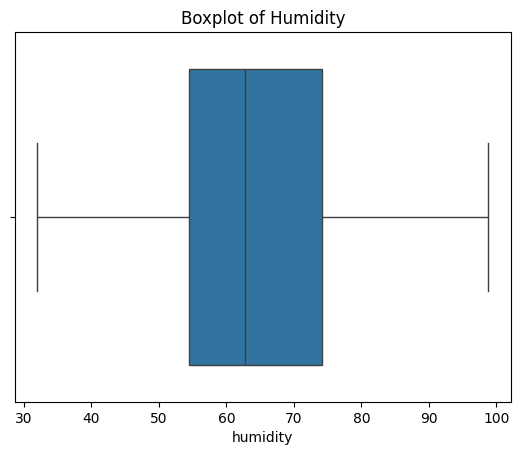

In [ ]:
sns.boxplot(x='humidity', data=df)
plt.title('Boxplot of Humidity')
plt.show()

Old Shape: (294, 33)
New Shape: (294, 33)


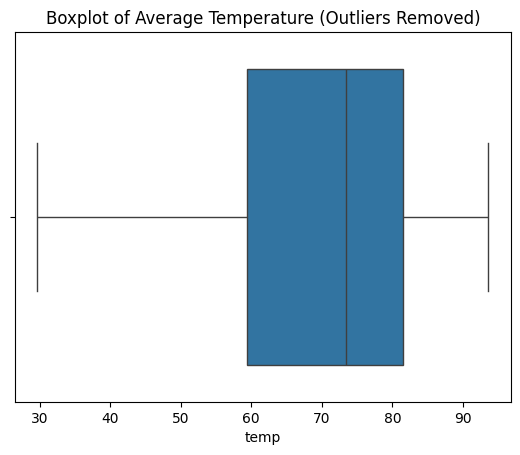

In [ ]:
df_temp = df.copy()

# Calculating Q1, Q3, and Inter Quartile Range for 'temp'
Q1 = np.percentile(df_temp['temp'], 25, interpolation='midpoint')
Q3 = np.percentile(df_temp['temp'], 75, interpolation='midpoint')
IQR = Q3 - Q1

# Defining upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Old Shape:", df_temp.shape)

# Remove outliers and print new shape
df_temp = df_temp[(df_temp['temp'] >= lower_bound) & (df_temp['temp'] <= upper_bound)]
print("New Shape:", df_temp.shape)

# Plot boxplot without outliers
sns.boxplot(x='temp', data=df_temp)
plt.title('Boxplot of Average Temperature (Outliers Removed)')
plt.show()





Old Shape (precip): (294, 33)
New Shape (precip): (224, 33)


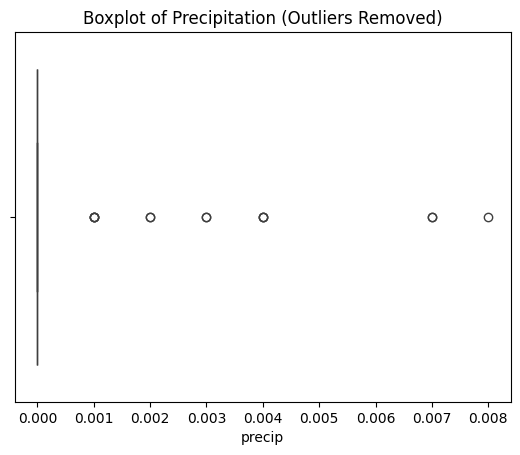

In [ ]:
# Removing Null Values
df_precip = df.copy()
df_precip = df_precip[df_precip['precip'].notnull()]

# Removing Outliers
Q1 = np.percentile(df_precip['precip'], 25, interpolation='midpoint')
Q3 = np.percentile(df_precip['precip'], 75, interpolation='midpoint')
IQR = Q3 - Q1 # Inter Quartile Range

print("Old Shape (precip):", df_precip.shape)

# Defining Upper & Lower Bounds
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

# Removing Outliers from 'Precip'
df_precip = df_precip[(df_precip['precip'] <= upper) & (df_precip['precip'] >= lower)]

print("New Shape (precip):", df_precip.shape)

# BoxPlot without outliers
sns.boxplot(x='precip', data=df_precip)
plt.title('Boxplot of Precipitation (Outliers Removed)')
plt.show()

3-D Plots


In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x='temp',            # Average temperature
    y='humidity',        # Humidity
    z='windgust',        # Wind gust speed
    color='conditions'   # Color by weather condition
)
fig.update_layout(title='3D Scatter Plot: Temp vs Humidity vs Wind Gust')
fig.show()

In [ ]:
fig = px.scatter_3d(
    df,
    x='tempmax',       # Maximum Temperature
    y='precip',        # Precipitation
    z='humidity',      # Humidity
    color='conditions'
)
fig.update_layout(title='3D Scatter Plot: Maximum Temperature vs Precipitation vs Humidity')
fig.show()


In [ ]:
fig = px.scatter_3d(df,
                    x='tempmin', # Minimum Temperature
                    y='tempmax', # Maximum Temperature
                    z='humidity', # Humidity
                    color='conditions'
)
fig.update_layout(title='3D Plot: Min Temp vs Max Temp vs Humidity')
fig.show()

**My Insights**

1. What variables does the dataset contain? How are they distributed?
**Answer:** This data set contains weather data for Dallas, Texas, US for the year 2024. It has 366 rows (entries) and 33 columns (variables). The columns include temperatures (maximum, minimum, feels like, feels like and average), humidity, precipitation (Probability/chance, cover, type) wind (gust, speed, direction), cloud cover, sea level pressure, snow (depth), solar (radiation, energy), sunrise, sunset, conditions, icons, moonphases, descriptions, UV index, severe risks, stations, dew along with other factors. The data types are a mix of 20 columns as floating-point numbers , 4 columns as integers, and 9 columns as objects.

2. Are there any notable data quality issues?
**Answer:** The missing values in the "Preciptype" column is one notable data quality issue that I discovered in this data set. Out of 366 entries, 249 entries are Null which meant that for most of the days in the previous year, the type of precipitation was not recorded. This is a huge deal for any type of analysis involving different types of precipitation (Rain, snow etc). Additionally, the Precipitation box plot had many outliers around 70 of them which was removed.

3. Are there any surprising relationships among the variables?
**Answer:** The analysis of the dataset reveals several interesting insights:

*   Weather Condition Distribution: The most frequent or common weather condition is 'Partially Cloudy', followed by 'Clear', and then 'Rain, Partially Cloudy'. It seems as if snow is a rare event
*  Weather Icon: most frequent icon is 'partly cloudy' followed by 'clear day', and then 'rain' in that order.

*   Temperature Relationships: There seems to be a  strong and positive correlation between the maximum and minimum temperatures. As the minimum temperature for a day increases, the maximum temperature also tends to increase. This was visualized in the scatter plot of 'Max Temperature vs. Min Temperature.'

*   Temperature and Humidity: The scatter plot of 'Temperature vs. Humidity' shows a diverse range of humidity levels throughout distinct temperatures. There is no direct linear type of relationship, but it looks like high humidity is more common at moderate temperatures


*   Positive correlations exist between other metrics such as: 'maximum feels like temperature' & 'minimum feels like temperature'solar radiation' & 'solar energy'.


*   'Humidity' & 'Cloud cover' do not have a very strong positive correlation, and there exists a negative correlation between 'sealevel pressure' & 'temperature'



*   The 3-D scatter plot of 'Min Temp vs Max Temp vs Humidity' displays the strong correlation between maximum & minimum temperatures while showing how the humidity level varies between the temperature ranges.


*   Outliers were observed in the box plots that were visualized for average temperatures and Precipitation. All of the outliers, were removed with around 70 outlier data points being removed from precipitation going from 294 to 224















4) You should investigate your initial questions, as well as any new questions that arise during your exploration. For each question, start by creating a visualization that might provide a useful answer. Finally, provide 8 or more visualizations detailing your most important insights.

**Answer:** I have provided well over 8 visualizations for my exploratory data analysis of the dallas weather data set as can be seen in the above cells.